In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

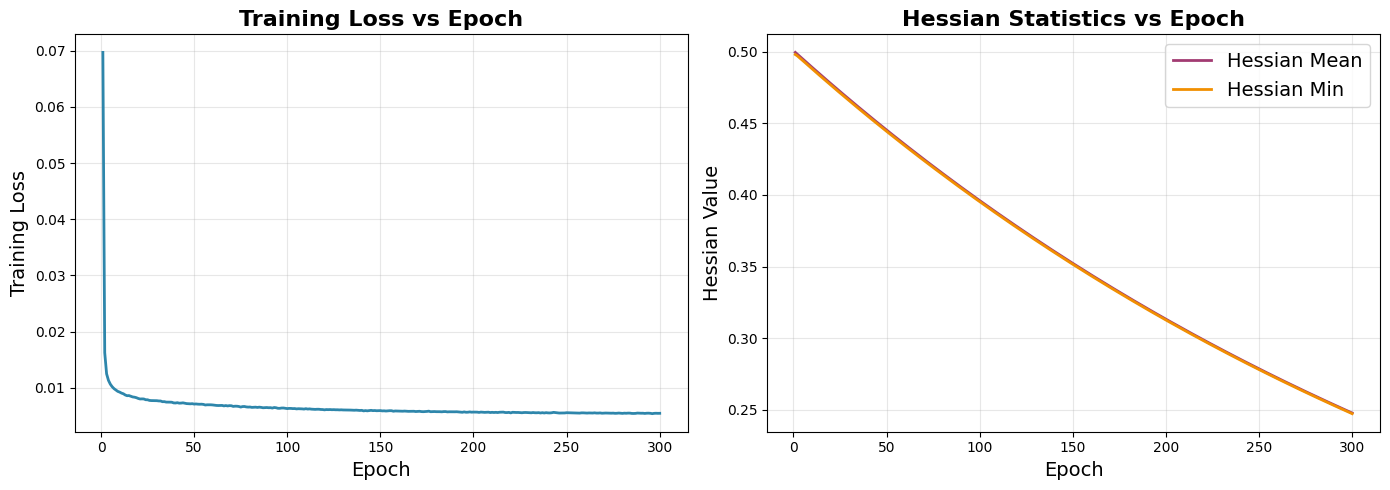

In [61]:
data = pd.read_csv('trained/ddpm/logs-ddpm-ivon.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

title_font_size = 16
ax_font_size = 14
legend_font_size = 14

# Plot 1: Loss vs Epoch
ax1.plot(data['epoch'], data['train_loss'], linewidth=2, color='#2E86AB')
ax1.set_xlabel('Epoch', fontsize=ax_font_size)
ax1.set_ylabel('Training Loss', fontsize=ax_font_size)
ax1.set_title('Training Loss vs Epoch', fontsize=title_font_size, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Hessian Stats vs Epoch
ax2.plot(data['epoch'], data['train_hess_mean'], linewidth=2, label='Hessian Mean', color='#A23B72')
ax2.plot(data['epoch'], data['train_hess_min'], linewidth=2, label='Hessian Min', color='#F18F01')
ax2.set_xlabel('Epoch', fontsize=ax_font_size)
ax2.set_ylabel('Hessian Value', fontsize=ax_font_size)
ax2.set_title('Hessian Statistics vs Epoch', fontsize=title_font_size, fontweight='bold')
ax2.legend(fontsize=legend_font_size)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ddpm-training-stats.png', dpi=300)
plt.show()


In [62]:
NUM_SAMPLES = 25

In [63]:
def plot_samples(samples, title=None):
    n_samples = len(samples)

    n_cols = math.ceil(math.sqrt(n_samples))
    n_rows = math.ceil(n_samples / n_cols)

    fig_size = (n_cols * 1.25, n_rows * 1.25)

    _, axes = plt.subplots(n_rows, n_cols, figsize=fig_size)

    if title:
        plt.suptitle(title, fontsize=16)

    if n_samples == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < n_samples:
            ax.imshow(samples[i].squeeze(), cmap="gray")
        ax.axis("off")

    plt.tight_layout()
    
    if title:
        filename = title.replace(" ", "_") + ".png"
        plt.savefig(filename, dpi=300)

In [64]:
SEED = 30

In [65]:
entropy = np.load(f'samples/entropy-seed-{SEED}.npy')
samples = np.load(f'samples/samples-seed-{SEED}.npy')
samplesxs = np.load(f"samples/samples-xs-seed-{SEED}.npy")

In [66]:
idx = np.argsort(entropy)
most_confident = samples[idx[:NUM_SAMPLES]]
least_confident = samples[idx[-NUM_SAMPLES:]]

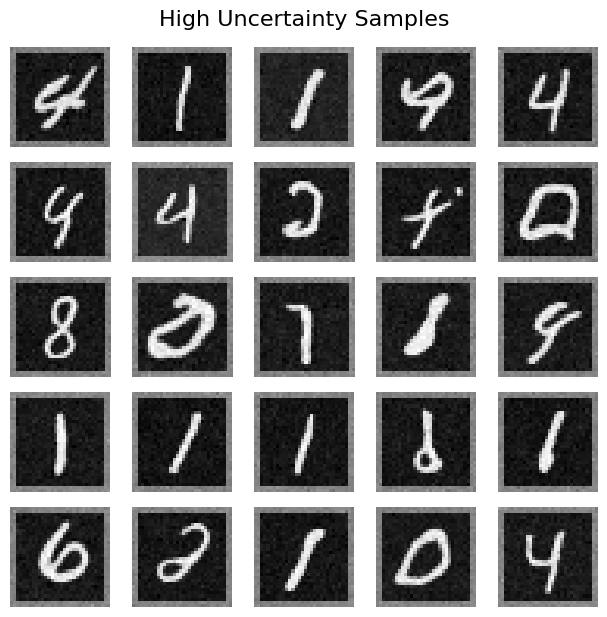

In [67]:
plot_samples(least_confident, title='High Uncertainty Samples')

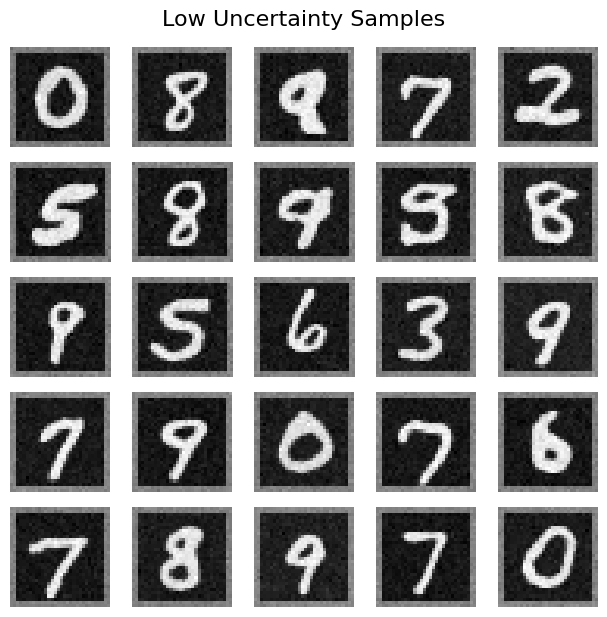

In [68]:
plot_samples(most_confident, title='Low Uncertainty Samples')

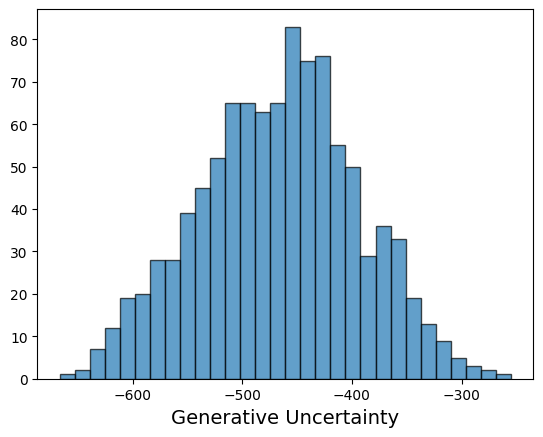

In [69]:
plt.hist(entropy, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Generative Uncertainty',fontsize=14)
plt.savefig('gen-uncertainty-class-dist.png', dpi=300)
plt.show()

In [70]:
def plot_mc_samples_grid(mean_sample, mc_samples, title, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)

    gs = fig.add_gridspec(3, 8, height_ratios=[2, 1, 1], hspace=0.3, wspace=0.1)

    ax_mean = fig.add_subplot(gs[0, 3:5])
    ax_mean.imshow(mean_sample.squeeze(), cmap='gray')
    # ax_mean.set_title('Mean Generated Sample', fontsize=18, fontweight='bold')
    ax_mean.axis('off')

    for i in range(16):
        row = 1 if i < 8 else 2
        col = i % 8
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(mc_samples[i].squeeze(), cmap='gray')
        # ax.set_title(f'{i+1}', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(title, dpi=300)
    plt.show()

/tmp/ipykernel_257279/1981083467.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


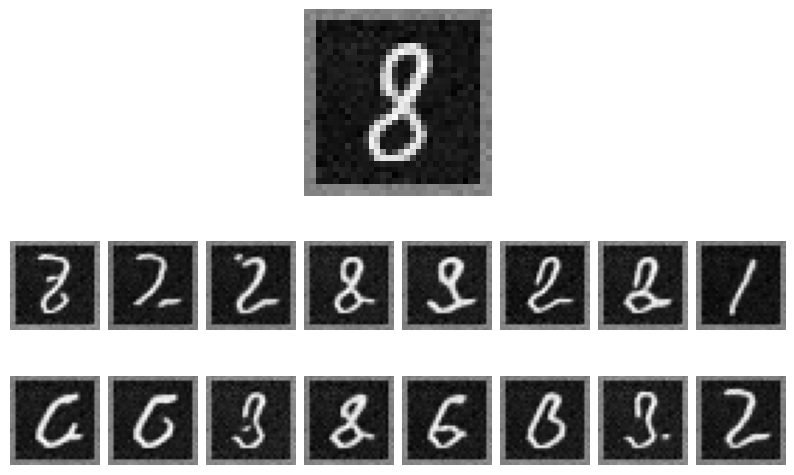

In [73]:
hu_index = -15
plot_mc_samples_grid(samples[idx[hu_index]], samplesxs[:, idx[hu_index]], title='high-mc-samples.png');

/tmp/ipykernel_257279/1981083467.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


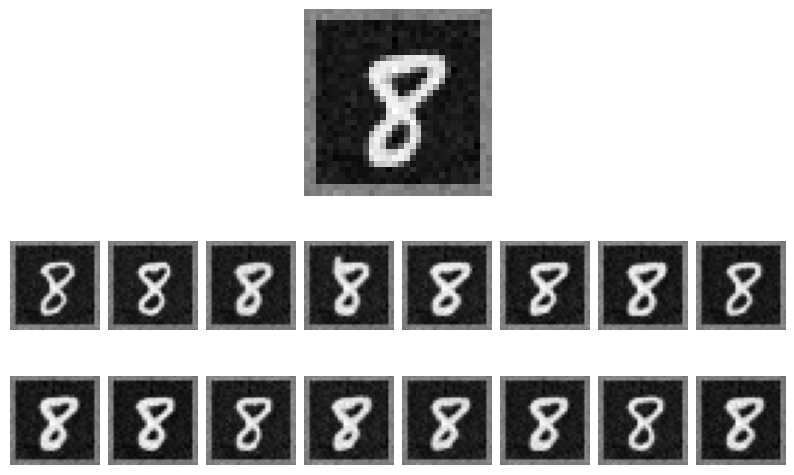

In [79]:
lu_index = 1
plot_mc_samples_grid(samples[idx[lu_index]], samplesxs[:, idx[lu_index]], title='low-mc-samples.png');